In [1]:
from src.utils.dataset import TradingDataset, TradingNormalizer

normalizer = TradingNormalizer(method='log_returns', history_len=256)

dataset = TradingDataset(
    data_path='data/',
    mode='validation',
    history_len=256, 
    target_len=32,
    normalizer=normalizer,
)

Found 56463 samples for validation mode


In [2]:
from models.diffusion_model import TradingGDTModel

model = TradingGDTModel.from_pretrained('TradingGDT-pretrained', device='mps')

/Users/honeysuckle/dev/TradingDiffusion/.TradingGDT_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Feature extractor успешно загружен
Модель успешно загружена из TradingGDT-pretrained


History prices shape: torch.Size([1, 256, 5])
Processed prices shape: torch.Size([1, 256, 256])
Timesteps: tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0], device='mps:0')
Num steps: 50


50it [00:11,  4.20it/s]


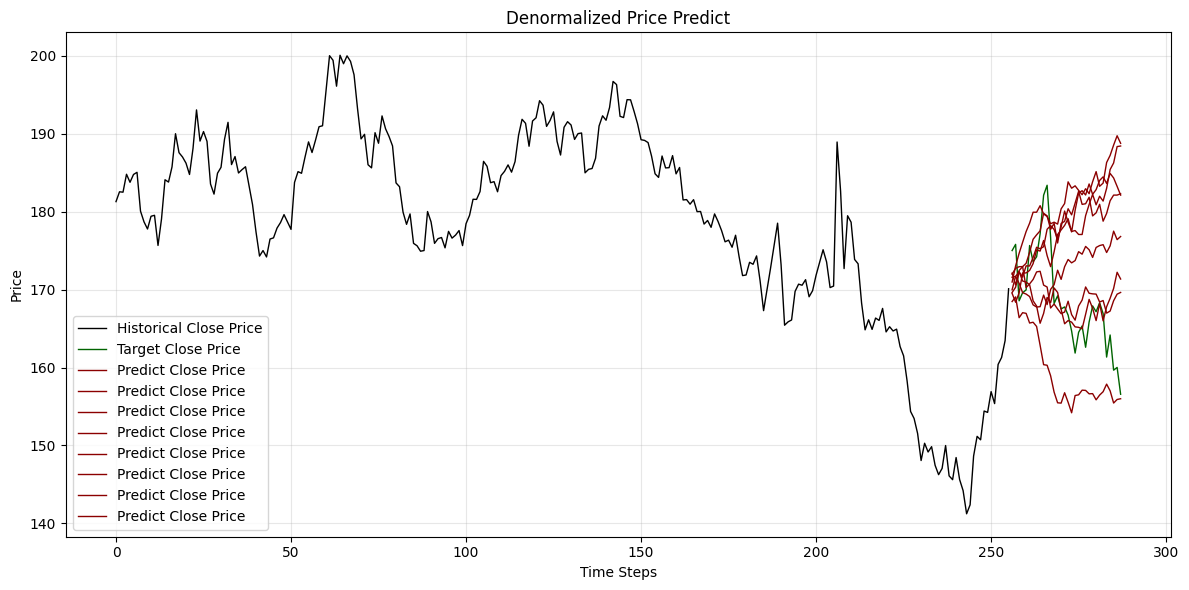

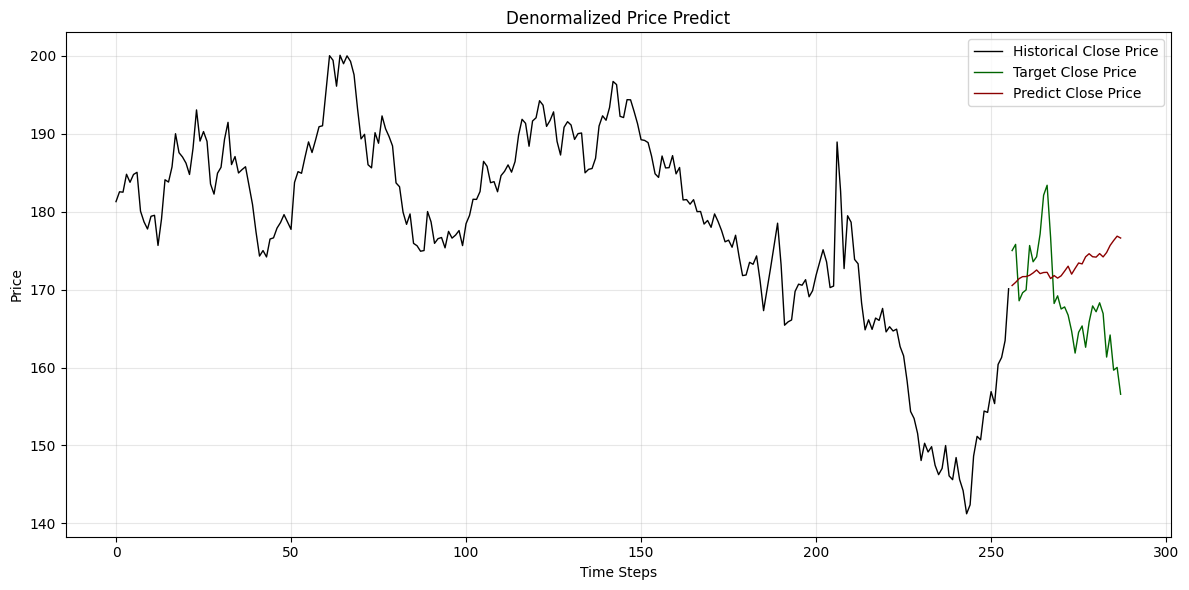

In [ ]:
import torch
from src.utils.visualization import plot_model_prediction, plot_model_prediction_denormalized
from pipelines.inference_pipeline import TradingGDTPipeline

pipe = TradingGDTPipeline(device='mps')

idx = torch.randint(0, len(dataset), (1,)).item()
sample = dataset[idx]

predict = pipe(
    model,
    history_prices=sample['history'],
    num_inference_steps=50,
    batch_size=1
)

plot_model_prediction_denormalized(sample['history'], sample['target'], sample['stats'], predict)
# plot_model_prediction_denormalized(sample['history'], sample['target'], sample['stats'], predict.mean(dim=0, keepdim=True))
plot_model_prediction(sample['history'], sample['target'], predict)